<a href="https://colab.research.google.com/github/choeuneheol/honrongmachine/blob/main/PART07_%EA%B5%B0%EC%A7%91_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##k-Means

In [1]:
#-*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

###[Step 1] 데이터 준비

In [2]:
#Wholesale customers 데이터셋 가져오기 (출처 : UCI ML Repository)

uci_path= 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path,header=0)

###[Step 2] 데이터 탐색

In [4]:
# 데이터 살펴보기
print(df.head())
print('\n')

# 데이터 자료형 확인
print(df.info())
print('\n')

# 데이터 통계 요약 정보 확인
print(df.describe())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen

###[Step 3] 데이터 전처리

In [5]:
# 분석에 사용할 속성 선택
x = df.iloc[:,:]
print(x[:5])
print('\n')

# 설명 변수 데이터 정규화
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)

print(x[:5])

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


###[Step 4] k - means 군집 모형 - sklearn 사용

[2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 1 2 1 2 1 1 0 2 2 1 1 2 1 1 1 1 1 1 2 1
 2 2 1 1 1 2 2 2 2 2 0 2 2 1 1 2 2 1 1 0 2 1 1 2 0 2 2 1 0 1 2 1 1 1 1 1 2
 2 1 1 2 1 1 1 2 2 1 2 0 0 1 1 1 1 1 0 1 2 1 2 1 1 1 2 2 2 1 1 1 2 2 2 2 1
 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 2 2 1 2 2 2 1 1 2 2 2 2 1 1 1 2 2 1 2 1 2 1 1 1 1 1 1 1 4 1
 1 1 1 2 2 1 1 1 2 1 1 3 2 3 3 2 2 3 3 3 2 3 3 3 2 3 0 3 3 2 3 2 3 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 0 3 3 3 3 3 3 3
 3 3 3 3 3 2 3 2 3 2 3 3 3 3 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 3 2
 3 2 2 3 2 2 2 2 2 2 2 3 3 2 3 3 2 3 3 2 3 3 3 2 3 3 3 3 3 4 3 3 3 3 3 2 3
 0 3 2 3 3 3 3 2 2 1 2 1 1 2 2 1 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 2 2 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1]


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656    

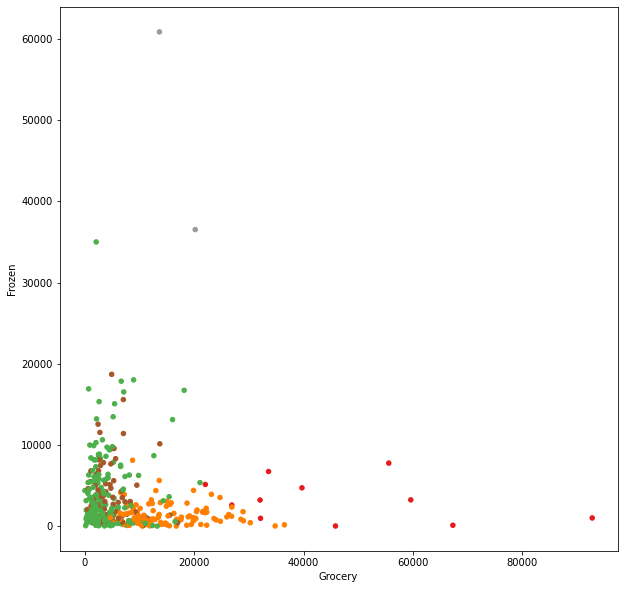

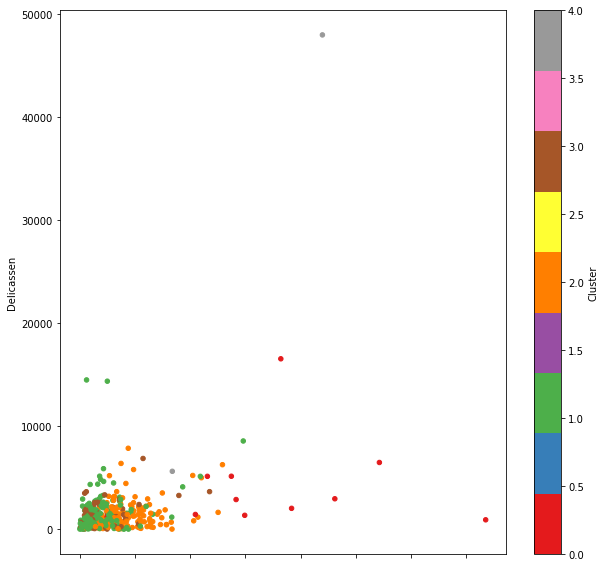

In [6]:
# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# 모형 객체 생성
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)

# 모형 학습
kmeans.fit(x)

# 예측 (군집)
cluster_label = kmeans.labels_
print(cluster_label)
print('\n')

# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())

# 그래프로 표현 - 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1',
        colorbar=False, figsize=(10,10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1',
        colorbar=True, figsize=(10,10))
plt.show()
plt.close()

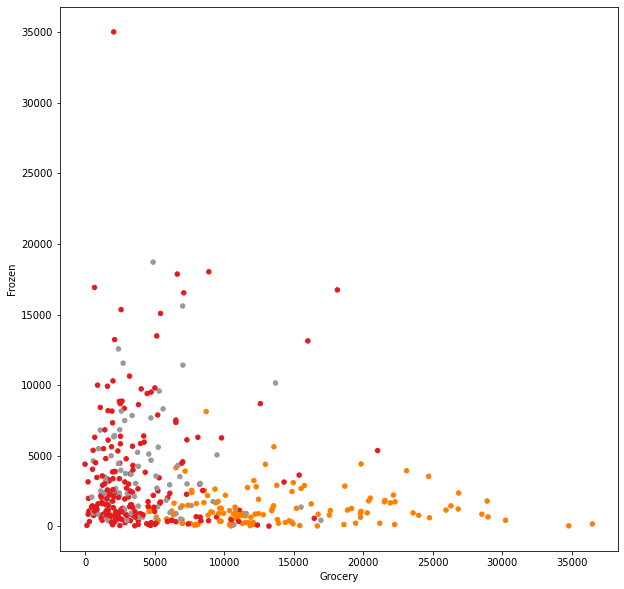

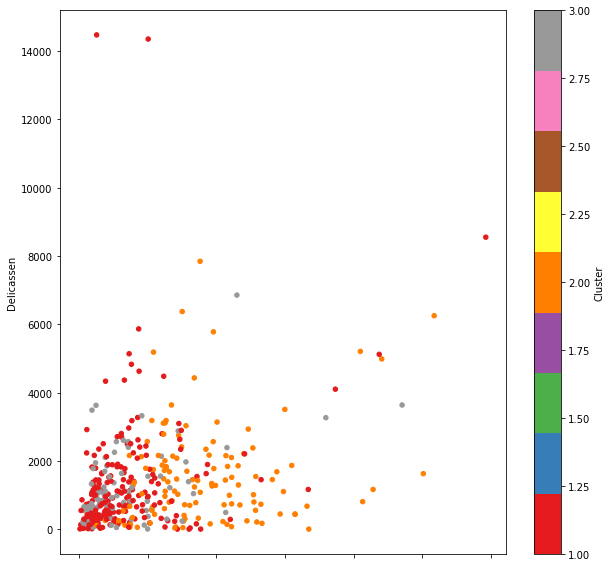

In [7]:
# 큰 값으로 구성된 클러스터(0, 4) 제외 - 값이 몰려 있는 구간을 자세하게 분석
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[-mask]

ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1',
         colorbar=False, figsize=(10,10))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1',
         colorbar=True, figsize=(10,10))

plt.show()
plt.close()